In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
#df = pd.read_csv('API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_5551656.csv', header = 5 )

In [ ]:
# Load dataset
path = "/content/drive/MyDrive/API_FP.CPI.TOTL.ZG_DS2_en_excel_v2_5551715.xls"
df=pd.read_excel(path,header=3)
df.head(5)

In [6]:
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,6.362961,6.079328,NaN
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439201,1.768436,2.130268,1.487416,1.764635,1.784050,1.758565,2.437609,3.745700,9.393839
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704,22.271564,25.754266,NaN


In [7]:
# Extract the three countries of Focus
def country1(Name):
    if Name in ['United States', 'Germany', 'United Kingdom']:
        return True
    else:
        return False
df = df[df['Country Name'].apply(lambda x: country1(x))]
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
55,Germany,DEU,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.536612,2.293695,2.843270,2.966960,2.335736,3.242319,...,1.504723,0.906794,0.514426,0.491747,1.509495,1.732169,1.445660,0.144878,3.066667,6.872574
81,United Kingdom,GBR,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.003576,3.447496,4.196499,2.018544,3.281587,4.773775,...,2.291667,1.451120,0.368047,1.008417,2.557756,2.292840,1.738105,0.989487,2.518371,7.922049
251,United States,USA,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.457976,1.070724,1.198773,1.239669,1.278912,1.585169,...,1.464833,1.622223,0.118627,1.261583,2.130110,2.442583,1.812210,1.233584,4.697859,8.002800


In [8]:
# Drop unnecessary columns
df.drop(['Indicator Name'], axis = 1, inplace = True)
df.drop(['Indicator Code'], axis = 1, inplace = True)
df.drop(['Country Code'], axis = 1, inplace = True)

In [9]:
# Transpose dataset
df=  df.transpose()
df.reset_index(inplace=True)
# Rename columns
df.rename(columns = ({'index':'Year', 55:'Germany', 81:'United Kingdom', 251:'United States'}), inplace= True)
df = df.iloc[1:,:]
df= df.astype('float64')
df

,Year,Germany,United Kingdom,United States
1,1960.0,1.536612,1.003576,1.457976
2,1961.0,2.293695,3.447496,1.070724
3,1962.0,2.843270,4.196499,1.198773
4,1963.0,2.966960,2.018544,1.239669
5,1964.0,2.335736,3.281587,1.278912
...,...,...,...,...
59,2018.0,1.732169,2.292840,2.442583
60,2019.0,1.445660,1.738105,1.812210
61,2020.0,0.144878,0.989487,1.233584
62,2021.0,3.066667,2.518371,4.697859


Text(0.5, 1.0, 'Correlation plot of the features present in the Inflation consume price dataset(annual %)')

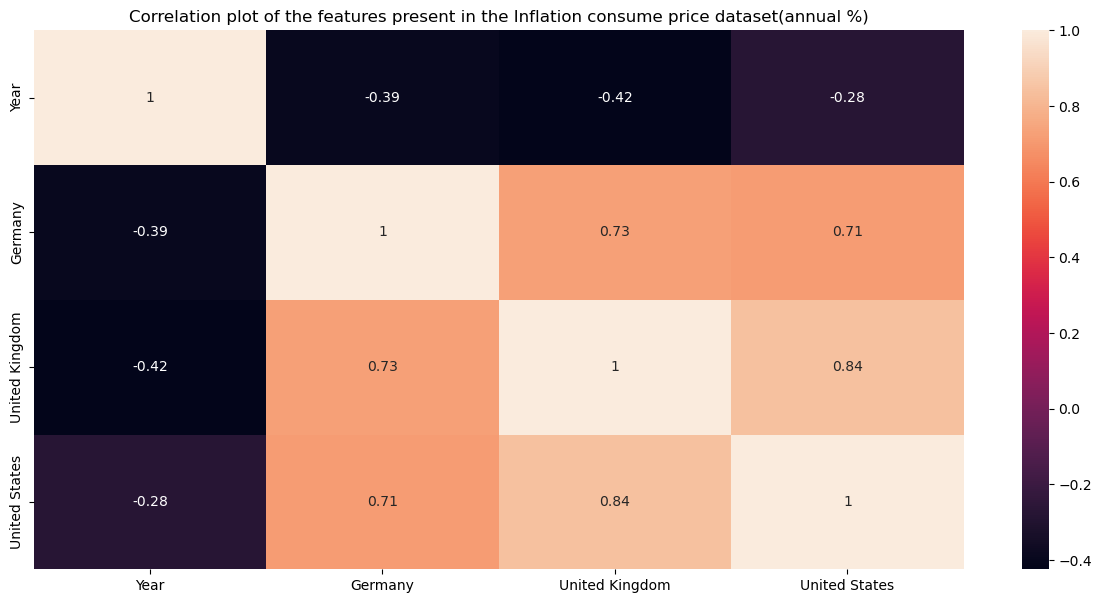

In [10]:
# Correlation plot of the features present in the Inflation consume price dataset(annual %)
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation plot of the features present in the Inflation consume price dataset(annual %)')

Text(0, 0.5, 'inflation Consumer Price (annual %)')

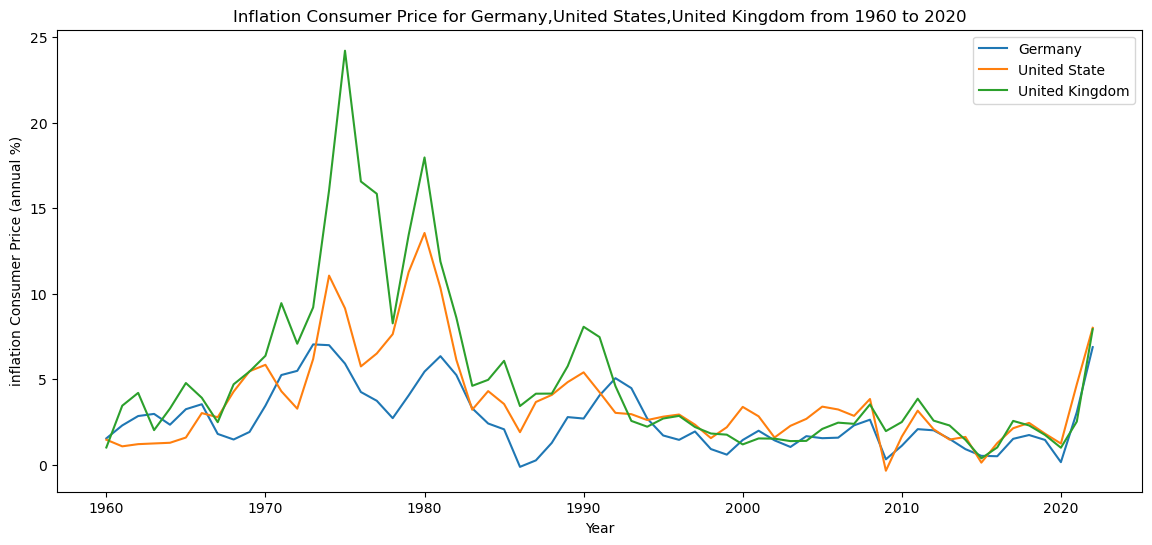

In [12]:
# Inflation Consumer Price for Germany,United States,United Kingdom from 1960 to 2020
plt.figure(figsize=(14,6))
plt.title("Inflation Consumer Price for Germany,United States,United Kingdom from 1960 to 2020")
sns.lineplot( x=df['Year'], y=df['Germany'], data = df, label = 'Germany')
sns.lineplot( x=df['Year'], y=df['United States'], data = df, label = 'United State')
sns.lineplot( x=df['Year'], y=df['United Kingdom'], data = df, label = 'United Kingdom')
plt.ylabel('inflation Consumer Price (annual %)')

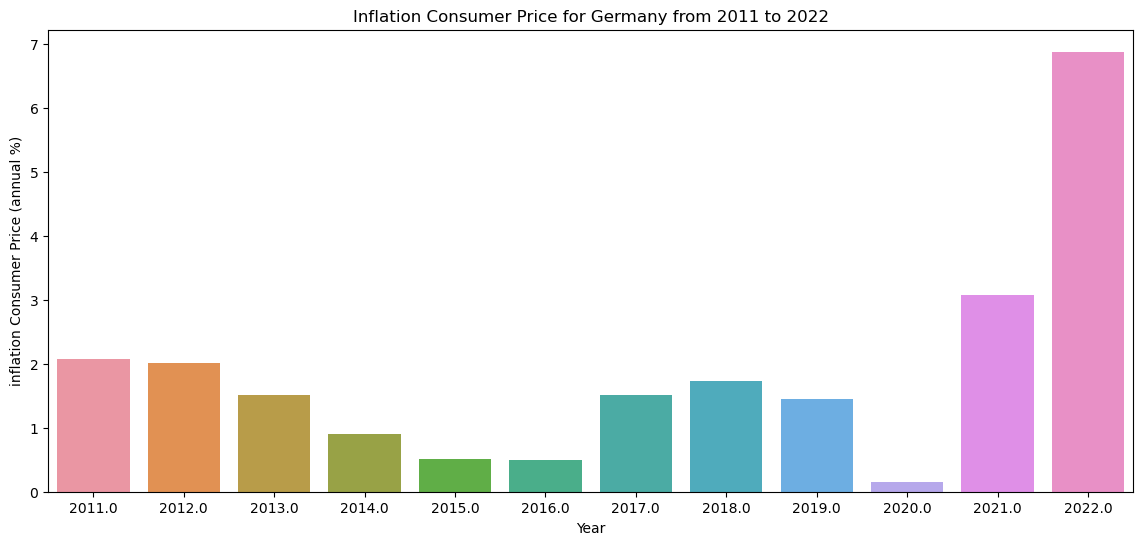

In [13]:
# Inflation Consumer Price for Germany from 2011 to 2022
df1 = df[df['Year']>=2011]
plt.figure(figsize=(14,6))
plt.title("Inflation Consumer Price for Germany from 2011 to 2022")
sns.barplot(data = df1, x =df1['Year'], y=df1['Germany'])
plt.ylabel('inflation Consumer Price (annual %)')
plt.savefig('output.jpg')

Text(0, 0.5, 'inflation Consumer Price (annual %)')

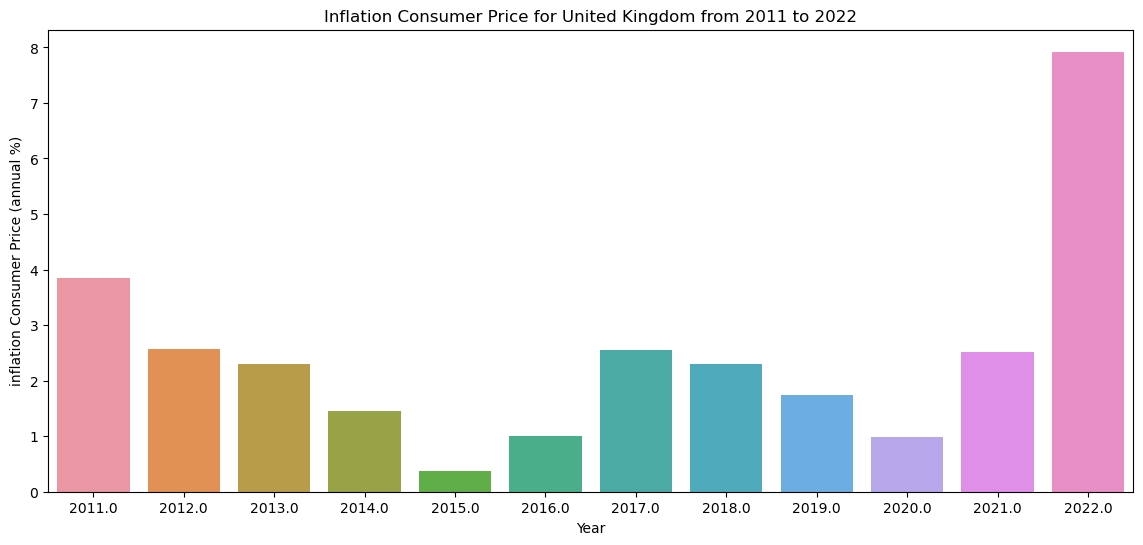

In [14]:
# Inflation Consumer Price for United Kingdom from 2011 to 2022
plt.figure(figsize=(14,6))
plt.title("Inflation Consumer Price for United Kingdom from 2011 to 2022")
sns.barplot(data = df1, x =df1['Year'], y=df1['United Kingdom'])
plt.ylabel('inflation Consumer Price (annual %)')


<Axes: title={'center': 'Inflation Consumer Price for United State from 2011 to 2022'}, xlabel='Year', ylabel='United States'>

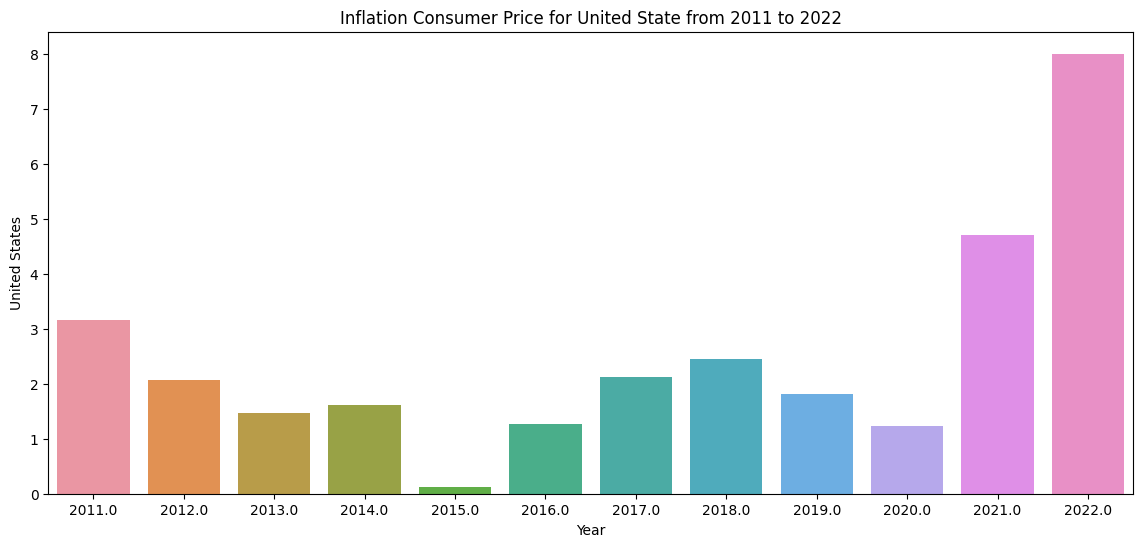

In [ ]:
# Inflation Consumer Price for United State from 2011 to 2022
plt.figure(figsize=(14,6))
plt.title("Inflation Consumer Price for United State from 2011 to 2022")
sns.barplot(data = df1, x =df1['Year'], y=df1['United States'])

In [ ]:
# Split data to train and test set
df_train= df.loc[:50]
df_test = df.loc[51:]

Predictive Model for Germany

In [ ]:
# Extracting Germany data
df_train = df_train[['Germany']].values
df_test = df_test[['Germany']].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_train=scaler.fit_transform(df_train)
df_test=scaler.transform(df_test)

# Function to create X and Y data shape
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#computing x_train and y_train using the create dataset functin
xtrain, ytrain = create_dataset(df_train, look_back=2)
#computing x_test and y_test using the create dataset function
xtest, ytest = create_dataset(df_test, look_back=2)

1.525782040091146


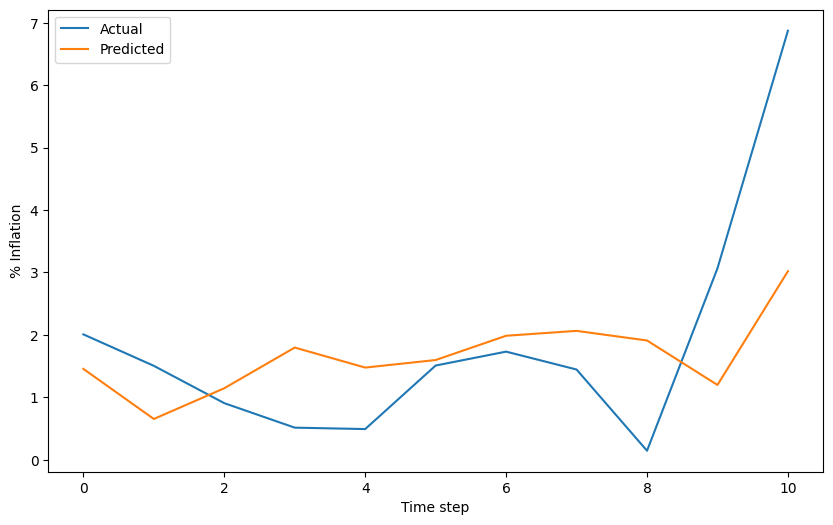

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
Rf= RandomForestRegressor()
Rf.fit(xtrain, ytrain)
ypred = Rf.predict(xtest)
from sklearn.metrics import mean_squared_error
yhat=scaler.inverse_transform(Rf.predict(xtest).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
print(mean_squared_error(y, yhat, squared=False) )

#plot actual vs predicted values
yhat=scaler.inverse_transform(Rf.predict(xtest).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel('Time step')
plt.ylabel('% Inflation')
plt.legend()
plt.show()

In [2]:
!pip install Xgboost

                                              0.0/70.9 MB ? eta -:--:--
                                             0.0/70.9 MB 660.6 kB/s eta 0:01:48
                                             0.0/70.9 MB 660.6 kB/s eta 0:01:48
                                             0.0/70.9 MB 660.6 kB/s eta 0:01:48
                                             0.1/70.9 MB 326.8 kB/s eta 0:03:37
                                             0.1/70.9 MB 435.7 kB/s eta 0:02:43
                                             0.1/70.9 MB 435.7 kB/s eta 0:02:43
                                             0.2/70.9 MB 499.5 kB/s eta 0:02:22
                                             0.2/70.9 MB 625.8 kB/s eta 0:01:53
                                             0.3/70.9 MB 582.4 kB/s eta 0:02:02
                                             0.3/70.9 MB 589.5 kB/s eta 0:02:00
                                             0.4/70.9 MB 696.3 kB/s eta 0:01:42
                                             0.4

In [3]:
# Xgboost
import xgboost as xgb
xgb=xgb.XGBRegressor()
xgb.fit(xtrain, ytrain)
ypred = xgb.predict(xtest)
from sklearn.metrics import mean_squared_error
yhat=scaler.inverse_transform(xgb.predict(xtest).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
print(mean_squared_error(y, yhat, squared=False) )

# plot actual vs predicted values
yhat=scaler.inverse_transform(xgb.predict(xtest).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel('Time step')
plt.ylabel('% Inflation')
plt.legend()
plt.show()

NameError: name 'xtrain' is not defined

1/1 [==============================] - 0s 456ms/step
1.2552905134400012


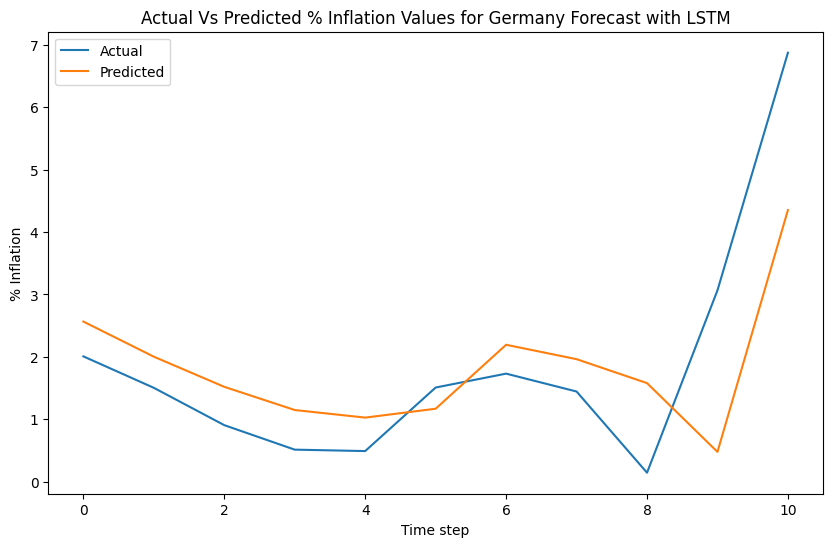

In [ ]:
# # # LSTM
from keras.losses import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

trainX = np.reshape(xtrain, (xtrain.shape[0], 1, xtrain.shape[1]))
testX = np.reshape(xtest, (xtest.shape[0], 1, xtest.shape[1]))


model = Sequential()
model.add(LSTM(500, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(loss = root_mean_squared_error, optimizer='adam')
history = model.fit(trainX, ytrain, epochs=300, validation_data=(testX, ytest), shuffle=False, verbose=0)
from sklearn.metrics import mean_squared_error
yhat=scaler.inverse_transform(model.predict(testX).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
print(mean_squared_error(y, yhat, squared=False ) )

# plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel('Time step')
plt.ylabel('% Inflation')
plt.title('Actual Vs Predicted % Inflation Values for Germany Forecast with LSTM')
plt.legend()
plt.show()

p-value: 0.7565940363395449
p-value: 9.819483497026521e-06


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


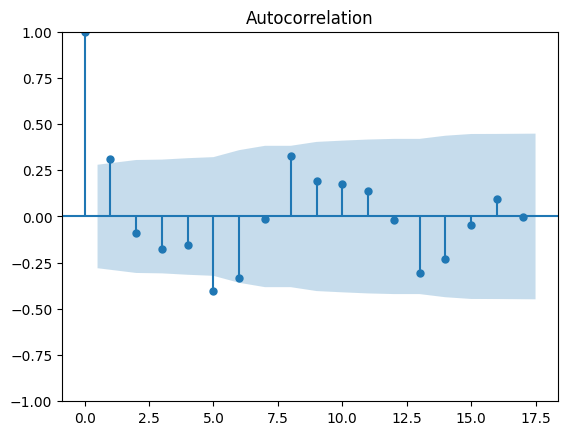

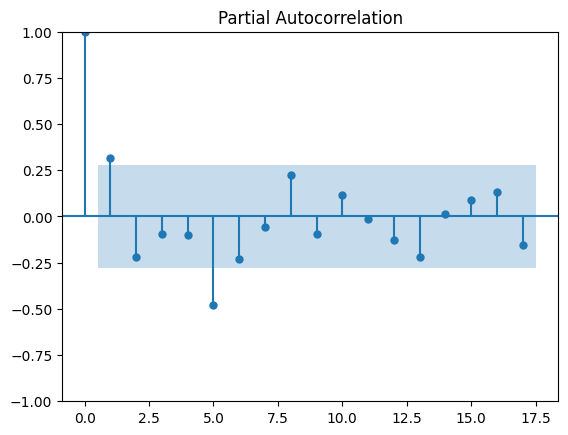

In [ ]:
# ARIMA
# Split data to train and test set
df_train= df.loc[:50]['Germany']
df_test = df.loc[51:]['Germany']

# Check for seasonality
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

# First DIfferencing
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train.diff().dropna())
print(f'p-value: {adf_test[1]}')

 # ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_diff = plot_acf(df_train.diff().dropna())
pacf_diff = plot_pacf(df_train.diff().dropna())

In [ ]:
p=range(1,5)
d=[1]
q=range(1,5)

import itertools
orders=list(itertools.product(p,d,q))
from statsmodels.tsa.arima.model import ARIMA


Results=[]
for order in orders:
  model = ARIMA(df_train, order=order)
  model_fit = model.fit()
  forecast_test = model_fit.forecast(len(df_test))
  rmse=np.sqrt( mean_squared_error(df_test, forecast_test) )
  Results.append([order, rmse])


Results



[[(1, 1, 1), 3.017152106599329],
 [(1, 1, 2), 3.237879841877797],
 [(1, 1, 3), 1.9278318047892775],
 [(1, 1, 4), 1.8897468284529588],
 [(2, 1, 1), 2.0593942136659273],
 [(2, 1, 2), 2.750326688568105],
 [(2, 1, 3), 1.7193627341868163],
 [(2, 1, 4), 1.8610096558415368],
 [(3, 1, 1), 2.7078112965936847],
 [(3, 1, 2), 2.116966878300296],
 [(3, 1, 3), 2.294397604815656],
 [(3, 1, 4), 2.3476599812697496],
 [(4, 1, 1), 2.141251726794862],
 [(4, 1, 2), 2.0396800307410485],
 [(4, 1, 3), 2.3020423585797256],
 [(4, 1, 4), 3.0320965395479655]]

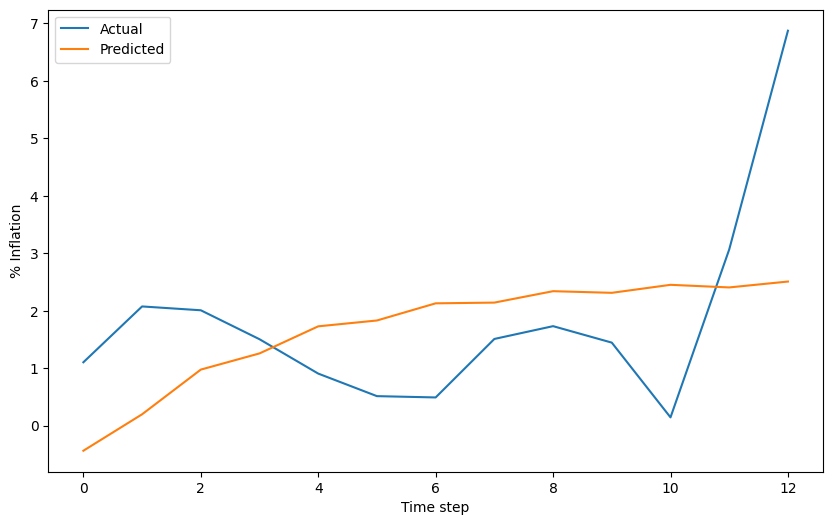

In [ ]:
model = ARIMA(df_train, order=(2,1,3))
model_fit = model.fit()
forecast_test = model_fit.forecast(len(df_test))
plt.figure(figsize=(10, 6))
plt.plot(df_test.values, label='Actual')
plt.plot(forecast_test.values, label='Predicted')
plt.xlabel('Time step')
plt.ylabel('% Inflation')
plt.legend()
plt.show()

Predictive Model for United States

In [ ]:
# Extracting Germany data
# Split data to train and test set
df_train= df.loc[:50]
df_test = df.loc[51:]
df_train = df_train[['United States']].values
df_test = df_test[['United States']].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_train=scaler.fit_transform(df_train)
df_test=scaler.transform(df_test)

# Function to create X and Y data shape
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#computing x_train and y_train using the create dataset functin
xtrain, ytrain = create_dataset(df_train, look_back=2)
#computing x_test and y_test using the create dataset function
xtest, ytest = create_dataset(df_test, look_back=2)

1.9043357534250422


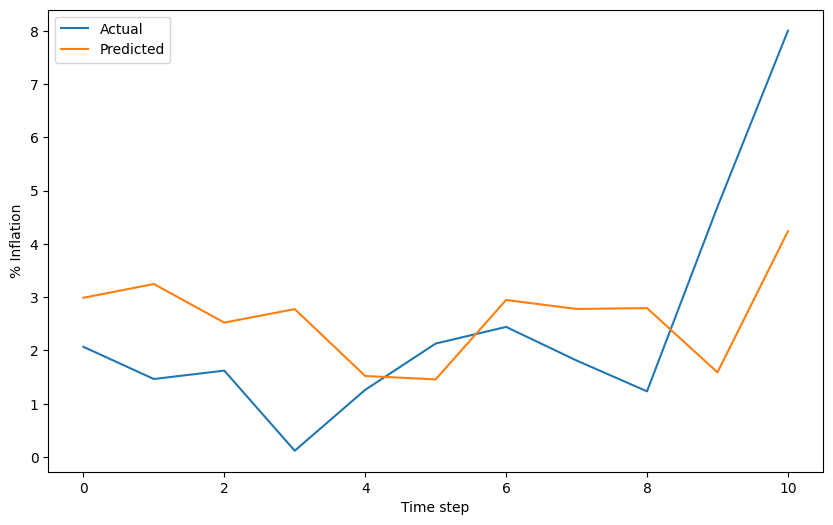

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
Rf= RandomForestRegressor()
Rf.fit(xtrain, ytrain)
ypred = Rf.predict(xtest)
from sklearn.metrics import mean_squared_error
yhat=scaler.inverse_transform(Rf.predict(xtest).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
print(mean_squared_error(y, yhat, squared=False) )

# plot actual vs predicted values
yhat=scaler.inverse_transform(Rf.predict(xtest).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel('Time step')
plt.ylabel('% Inflation')
plt.legend()
plt.show()

1.7073574610378348


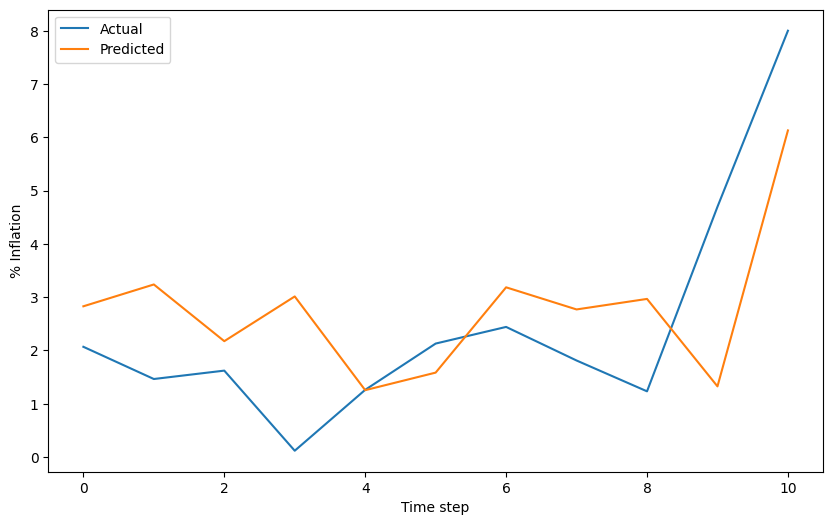

In [ ]:
# Xgboost
import xgboost as xgb
xgb=xgb.XGBRegressor()
xgb.fit(xtrain, ytrain)
ypred = xgb.predict(xtest)
from sklearn.metrics import mean_squared_error
yhat=scaler.inverse_transform(xgb.predict(xtest).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
print(mean_squared_error(y, yhat, squared=False) )

# plot actual vs predicted values
yhat=scaler.inverse_transform(xgb.predict(xtest).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel('Time step')
plt.ylabel('% Inflation')
plt.legend()
plt.show()

1/1 [==============================] - 1s 657ms/step
1.5338613671702894
1/1 [==============================] - 0s 37ms/step


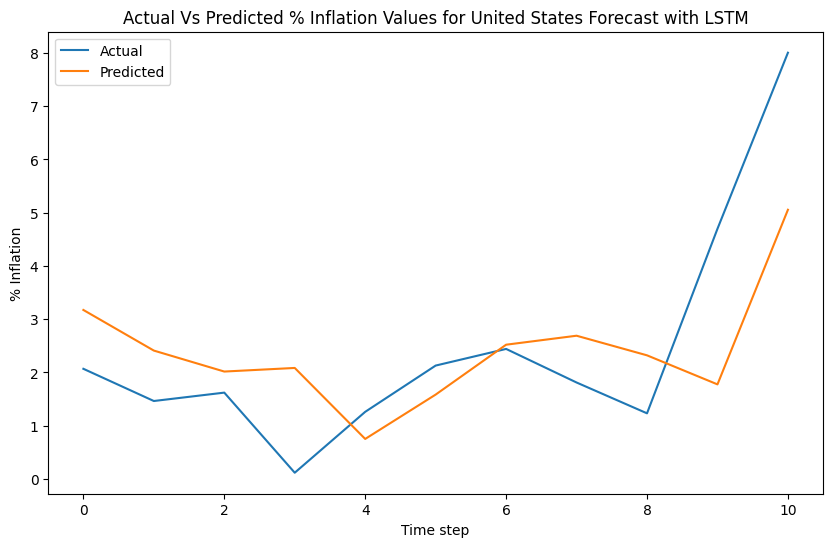

In [ ]:
# # LSTM
from keras.losses import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

trainX = np.reshape(xtrain, (xtrain.shape[0], 1, xtrain.shape[1]))
testX = np.reshape(xtest, (xtest.shape[0], 1, xtest.shape[1]))


model = Sequential()
model.add(LSTM(500, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(loss = root_mean_squared_error, optimizer='adam')
history = model.fit(trainX, ytrain, epochs=300, validation_data=(testX, ytest), shuffle=False, verbose=0)
from sklearn.metrics import mean_squared_error
yhat=scaler.inverse_transform(model.predict(testX).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
print(mean_squared_error(y, yhat, squared=False ) )

# plot actual vs predicted values
yhat=scaler.inverse_transform(model.predict(testX).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel('Time step')
plt.ylabel('% Inflation')
plt.title('Actual Vs Predicted % Inflation Values for United States Forecast with LSTM')
plt.legend()
plt.show()

p-value: 0.469732370710599
p-value: 1.6664405267562703e-08


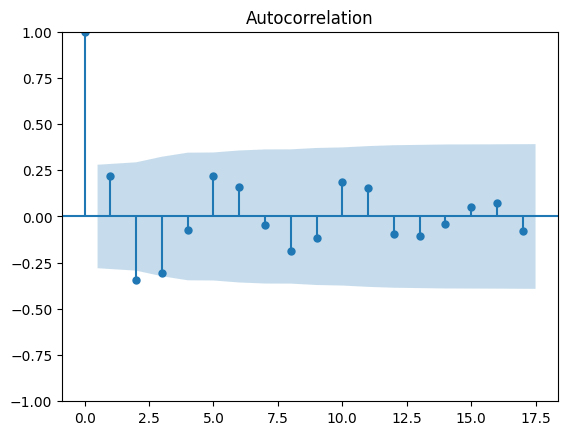

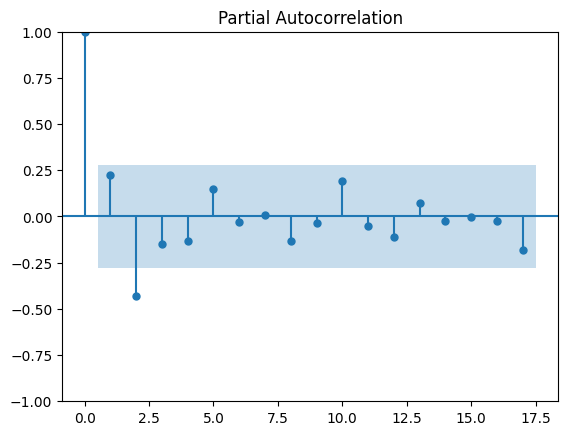

In [ ]:
# ARIMA
# Split data to train and test set
df_train= df.loc[:50]['United States']
df_test = df.loc[51:]['United States']

# Check for seasonality
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

# First DIfferencing
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train.diff().dropna())
print(f'p-value: {adf_test[1]}')

 # ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_diff = plot_acf(df_train.diff().dropna())
pacf_diff = plot_pacf(df_train.diff().dropna())

In [ ]:
p=range(1,5)
d=[1]
q=range(1,5)

import itertools
orders=list(itertools.product(p,d,q))
from statsmodels.tsa.arima.model import ARIMA


Results=[]
for order in orders:
  model = ARIMA(df_train, order=order)
  model_fit = model.fit()
  forecast_test = model_fit.forecast(len(df_test))
  rmse=np.sqrt ( mean_squared_error(df_test, forecast_test) )
  Results.append([order, rmse])

Results


[[(1, 1, 1), 5.167267624774634],
 [(1, 1, 2), 3.040365607312685],
 [(1, 1, 3), 3.104526462433225],
 [(1, 1, 4), 3.0669566052435635],
 [(2, 1, 1), 3.185012193015395],
 [(2, 1, 2), 3.1605441657789632],
 [(2, 1, 3), 3.30397509191447],
 [(2, 1, 4), 3.141927231604796],
 [(3, 1, 1), 3.1472593547342886],
 [(3, 1, 2), 3.1582433847513034],
 [(3, 1, 3), 3.3724394371398474],
 [(3, 1, 4), 3.1130803661396826],
 [(4, 1, 1), 3.1480863343978136],
 [(4, 1, 2), 3.487021061219401],
 [(4, 1, 3), 3.2602052794595306],
 [(4, 1, 4), 3.245462139926633]]

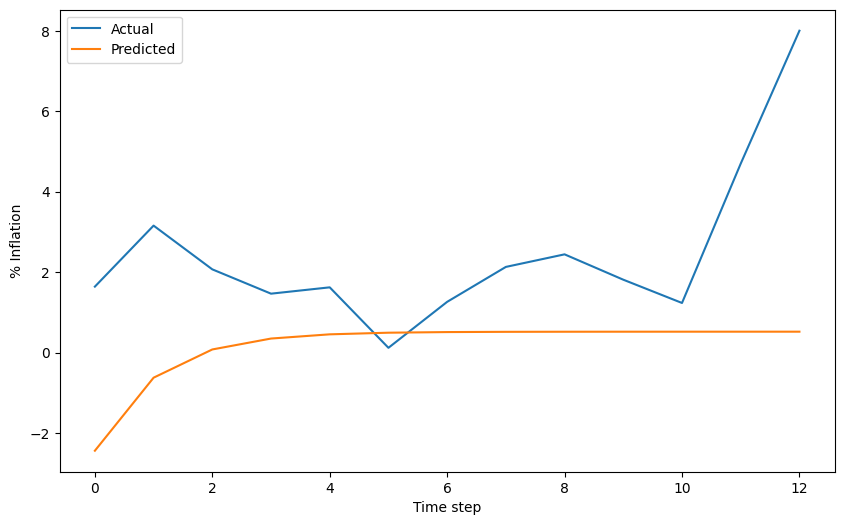

In [ ]:
model = ARIMA(df_train, order=(1,1,2))
model_fit = model.fit()
forecast_test = model_fit.forecast(len(df_test))
plt.figure(figsize=(10, 6))
plt.plot(df_test.values, label='Actual')
plt.plot(forecast_test.values, label='Predicted')
plt.xlabel('Time step')
plt.ylabel('% Inflation')
plt.legend()
plt.show()

Predictive Model for United Kingdom

In [ ]:
# Extracting Germany data
# Split data to train and test set
df_train= df.loc[:50]
df_test = df.loc[51:]
df_train = df_train[['United Kingdom']].values
df_test = df_test[['United Kingdom']].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_train=scaler.fit_transform(df_train)
df_test=scaler.transform(df_test)

# Function to create X and Y data shape
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#computing x_train and y_train using the create dataset functin
xtrain, ytrain = create_dataset(df_train, look_back=2)
#computing x_test and y_test using the create dataset function
xtest, ytest = create_dataset(df_test, look_back=2)

1.6140777661270072


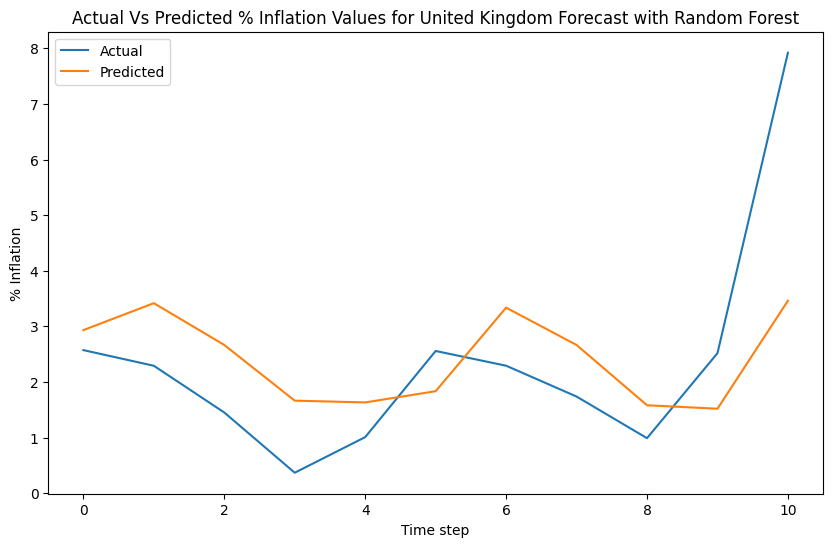

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
Rf= RandomForestRegressor()
Rf.fit(xtrain, ytrain)
ypred = Rf.predict(xtest)
from sklearn.metrics import mean_squared_error
yhat=scaler.inverse_transform(Rf.predict(xtest).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
print(mean_squared_error(y, yhat, squared=False) )

# plot actual vs predicted values
yhat=scaler.inverse_transform(Rf.predict(xtest).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel('Time step')
plt.ylabel('% Inflation')
plt.title('Actual Vs Predicted % Inflation Values for United Kingdom Forecast with Random Forest')
plt.legend()
plt.show()

1.7128077574237843


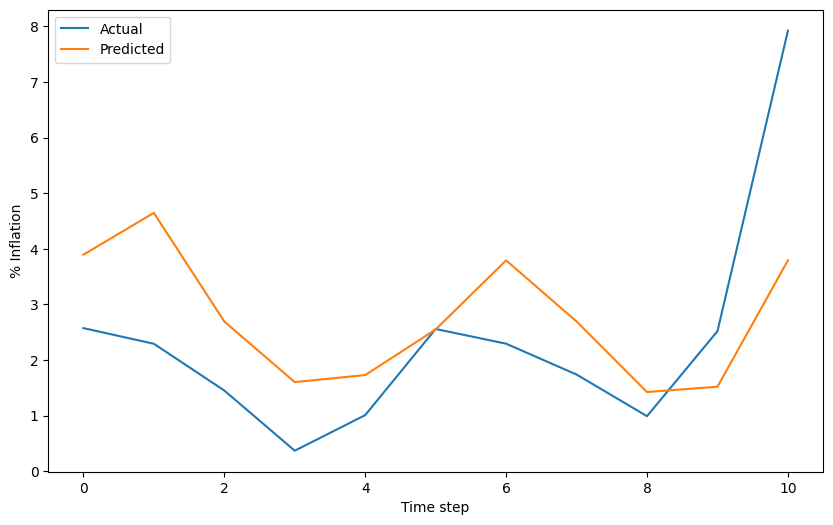

In [ ]:
# Xgboost
import xgboost as xgb
xgb=xgb.XGBRegressor()
xgb.fit(xtrain, ytrain)
ypred = xgb.predict(xtest)
from sklearn.metrics import mean_squared_error
yhat=scaler.inverse_transform(xgb.predict(xtest).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
print(mean_squared_error(y, yhat, squared=False) )

# plot actual vs predicted values
yhat=scaler.inverse_transform(xgb.predict(xtest).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel('Time step')
plt.ylabel('% Inflation')
plt.legend()
plt.show()

1/1 [==============================] - 0s 449ms/step
1.8197291624113823
1/1 [==============================] - 0s 30ms/step


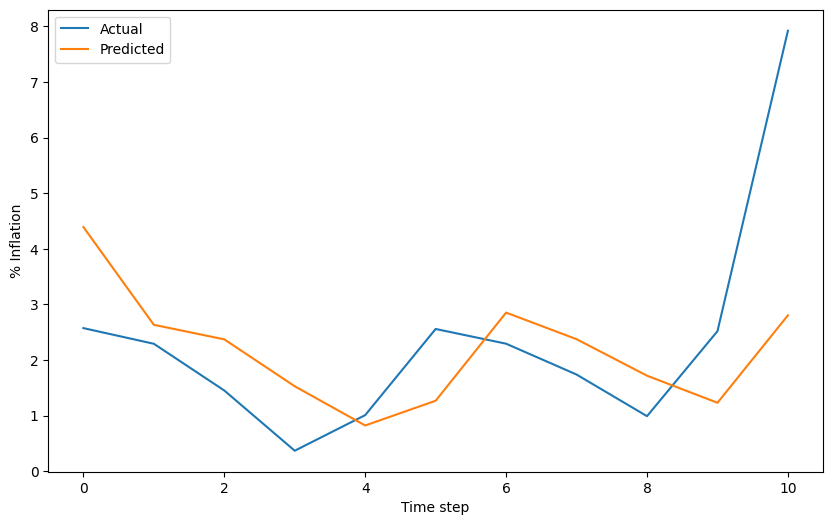

In [ ]:
# # LSTM
from keras.losses import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

trainX = np.reshape(xtrain, (xtrain.shape[0], 1, xtrain.shape[1]))
testX = np.reshape(xtest, (xtest.shape[0], 1, xtest.shape[1]))


model = Sequential()
model.add(LSTM(500, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(loss = root_mean_squared_error, optimizer='adam')
history = model.fit(trainX, ytrain, epochs=300, validation_data=(testX, ytest), shuffle=False, verbose=0)
from sklearn.metrics import mean_squared_error
yhat=scaler.inverse_transform(model.predict(testX).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
print(mean_squared_error(y, yhat, squared=False ) )

# plot actual vs predicted values
yhat=scaler.inverse_transform(model.predict(testX).reshape(-1, 1))
y=scaler.inverse_transform(ytest.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel('Time step')
plt.ylabel('% Inflation')
plt.legend()
plt.show()

p-value: 0.41896943975575734
p-value: 0.09937169063887652
p-value: 3.67029471496841e-13


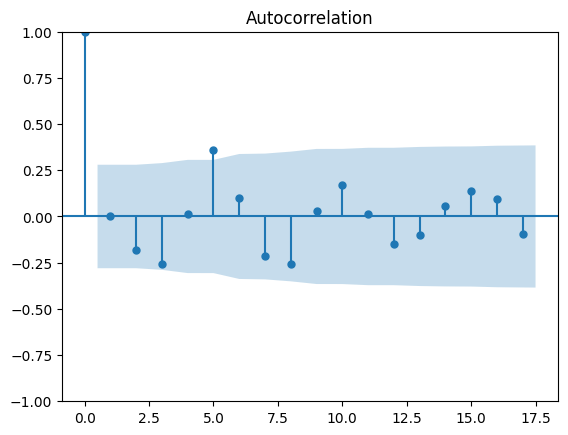

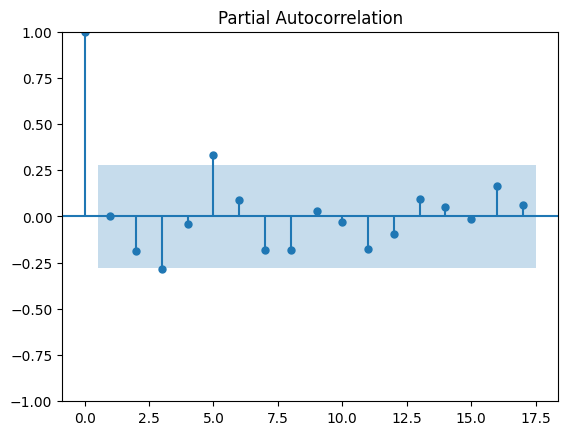

In [ ]:
# ARIMA
# Split data to train and test set
df_train= df.loc[:50]['United Kingdom']
df_test = df.loc[51:]['United Kingdom']

# Check for seasonality
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

# First DIfferencing
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train.diff().dropna())
print(f'p-value: {adf_test[1]}')

# second DIfferencing
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train.diff().diff().dropna())
print(f'p-value: {adf_test[1]}')

 # ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_diff = plot_acf(df_train.diff().dropna())
pacf_diff = plot_pacf(df_train.diff().dropna())

In [ ]:
p=range(1,5)
d=[2]
q=range(1,5)

import itertools
orders=list(itertools.product(p,d,q))
from statsmodels.tsa.arima.model import ARIMA


Results=[]
for order in orders:
  model = ARIMA(df_train, order=order)
  model_fit = model.fit()
  forecast_test = model_fit.forecast(len(df_test))
  rmse=np.sqrt ( mean_squared_error(df_test, forecast_test) )
  Results.append([order, rmse])

Results


[[(1, 2, 1), 1.8259840880676048],
 [(1, 2, 2), 1.8294225687577472],
 [(1, 2, 3), 1.9126892874983747],
 [(1, 2, 4), 2.2044153076918134],
 [(2, 2, 1), 1.8336880106546298],
 [(2, 2, 2), 2.01934166721769],
 [(2, 2, 3), 1.7986094702883313],
 [(2, 2, 4), 1.9895037993039504],
 [(3, 2, 1), 2.2344812477042577],
 [(3, 2, 2), 2.2403803199563184],
 [(3, 2, 3), 1.8692979836450443],
 [(3, 2, 4), 1.9386001170686418],
 [(4, 2, 1), 1.779659673815734],
 [(4, 2, 2), 1.7718193390643198],
 [(4, 2, 3), 2.029469587269288],
 [(4, 2, 4), 1.9860389036717814]]

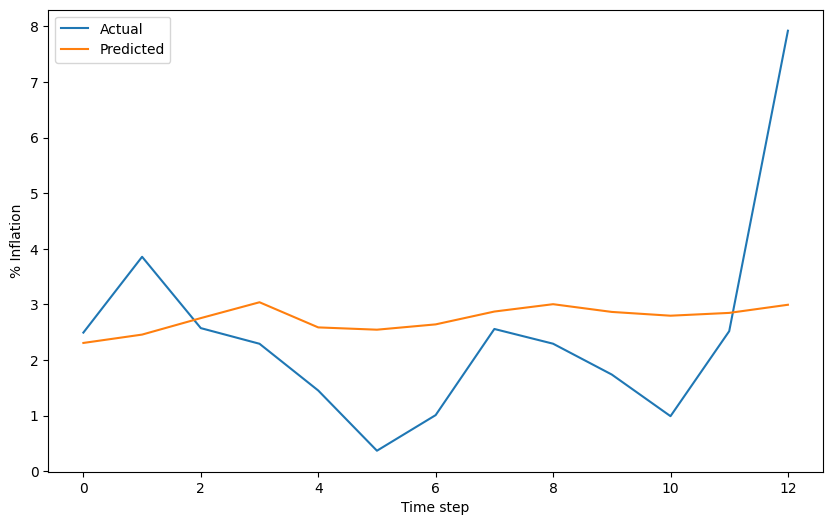

In [ ]:
model = ARIMA(df_train, order=(4,2,2))
model_fit = model.fit()
forecast_test = model_fit.forecast(len(df_test))
plt.figure(figsize=(10, 6))
plt.plot(df_test.values, label='Actual')
plt.plot(forecast_test.values, label='Predicted')
plt.xlabel('Time step')
plt.ylabel('% Inflation')
plt.legend()
plt.show()